# Generate Simulated Data: Fixed-Plaintext-Dataset-3

In [116]:
#import python libraries

import unittest
import random
from random import randint
from random import gauss
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os.path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from tqdm import tnrange,tqdm_notebook

In [117]:
# Define lengh for the data set
data_leng = 600000
numberOfSamples = 50

# Define key for encryption
key = 23

# Position of the masked and leakage (index starts with 0)
fieldMaskedLekage = 24
fieldMasked = 4

#Random Plaintext
FixedPlaintext = True

# Define gauss niose
noiseStart = 0.0
noiseEnd = 5.0

# Define jitter shift range
activateJitter = False

if activateJitter == True:
    # Value for jitter 
    jitterLeft = -5
    jitterRight = 5
else:
    jitterLeft = None
    jitterRight = None

# If masked used True 
maskedValue = True

In [118]:
# Define settings table
settingsTable = pd.DataFrame([None])
settingsTable['data_leng'] = pd.DataFrame([data_leng])
settingsTable['numberOfSamples'] = numberOfSamples
settingsTable['key'] = key
settingsTable['noiseStart'] = noiseStart
settingsTable['noiseEnd'] = noiseEnd
settingsTable['jitterLeft'] = jitterLeft
settingsTable['jitterRight'] = jitterRight
settingsTable = settingsTable.drop(0,axis=True)

In [119]:
settingsTable

,data_leng,numberOfSamples,key,noiseStart,noiseEnd,jitterLeft,jitterRight
0,600000,50,23,0.0,5.0,None,None


In [120]:
# AES Sbox
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

In [121]:
# Generate random plaintext
plaintext = []
fixedPlaintext = random.randint(0,255)
mask = []
for x in range(data_leng):
    if FixedPlaintext == True:
        plaintext.append(fixedPlaintext)
    else:
        plaintext.append(random.randint(0,255))
    
    mask.append(random.randint(0,255))

print("plaintext:",plaintext[0:5],'\nmask',mask[0:5])

plaintext: [236, 236, 236, 236, 236] 
mask [69, 82, 253, 31, 160]


In [122]:
# Verify size of plaintext
len(plaintext)

600000

In [123]:
#Generate leaked data with key=23 and labels
leakedData = []
#fixed key
key = 23
labels = []
for d in plaintext:
    leakedData.append(bin((AES_Sbox[d^key])).count("1")+gauss(noiseStart, noiseEnd))
    labels.append(bin(AES_Sbox[d^key]).count("1"))
print("leakedData:",leakedData[0:5],"\nlabels:",labels[0:5])

leakedData: [5.772912862908129, 5.542152783860556, 8.981660584946496, 6.693753637683519, 11.71007690371085] 
labels: [4, 4, 4, 4, 4]


In [124]:
# Verify size of leakedData 
len(leakedData)

600000

In [125]:
# Verify size of labels 
len(labels)

600000

In [126]:
maskedData = []
maskedNoise = []
maskIndex = 0
for d in plaintext:
    maskedData.append((bin(((AES_Sbox[d^key])^mask[maskIndex])).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise.append((bin(mask[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskIndex = maskIndex + 1
print("maskedData:",maskedData[0:5],"\nmaskedNoise:",maskedNoise[0:5])

maskedData: [2.977635046397506, 1.8722253553905581, 5.959553384718459, -0.6638402964073331, 5.1923445661757786] 
maskedNoise: [8.159117270701971, 2.7832441935682164, 12.643740833941582, 8.812999317118141, -2.0931507156970595]


In [127]:
# Generate random traces and repalce the t=25 with the leaked data
from collections import deque
rawTraces = []
randomJitter = []
# Loop to generate the traces
for i in tnrange(data_leng):
    rawData=[]
    
    #loop to repalce the sample
    for z in range(numberOfSamples):
        
        # replace sample at 5th position with the mask and added noise 
        if z == fieldMasked:
            rawData.append(maskedNoise[i])
            
        # Replace sample at 25th position with HW( sbox( plaintext xor key ) xor mask) + noise    
        elif z == fieldMaskedLekage:
            rawData.append(maskedData[i])
            
        # Else create random sample
        else:   
            rawData.append(bin(randint(0,255)).count("1")+gauss(noiseStart, noiseEnd))
    
    # Add jitter
    if activateJitter == True:
        item = deque(rawData)
        tmpJitter = random.randint(jitterLeft,jitterRight)
        item.rotate(tmpJitter)
        randomJitter.append(tmpJitter)
        
        #Full dataset with all traces 
        rawTraces.append(item)
    else:
        rawTraces.append(rawData)

print("First generated trace: ",rawTraces[0])
print("Second generated trace:",rawTraces[1])
print("Third generated trace: ",rawTraces[2])


First generated trace:  [10.346358327500607, -0.9372676921369294, 2.2474799729137187, -5.7397066483191175, 8.159117270701971, -4.9419614289516485, 0.8171098995912676, 10.317182224784855, 4.021333790993404, 4.794708431227605, 9.452881943362225, -0.10703367754362336, 4.715367419852531, -10.151002449454273, 3.9615931811571254, 4.63217575538801, 1.2152751874038719, 2.4487059779070606, -0.23969142906629104, 1.6382001973854639, -0.13287300944618696, 7.47471684624185, 4.1860118778878475, 8.786666353013594, 2.977635046397506, 10.163628775829, 1.5051744470434958, 3.3224657066526455, 3.121760549453583, 1.239732255424646, 9.319490725168617, 3.9668609137321056, 4.253356339673199, 10.967441217281927, 4.507931107465869, 7.232566600193767, -0.3037259252453297, 4.1462981774943986, 2.5418135502881203, -5.138982172119867, 12.119929832436757, 1.2961644588771342, 3.762687743767303, 1.9556534888343502, 3.3441573794323505, 5.1065052402671025, 1.2480383168600833, 3.8940311572686648, -5.840298271124285, -6.7

In [128]:
# Verify size of leakedData 
len(rawTraces)

600000

## Plot Simulated Data

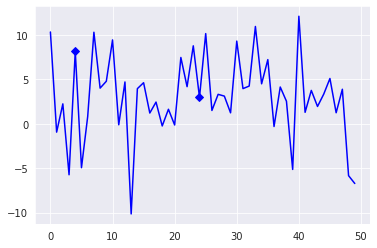

In [129]:
sns.set_style("darkgrid")
plt.plot(rawTraces[0],'-bD',markevery=[fieldMaskedLekage,fieldMasked])

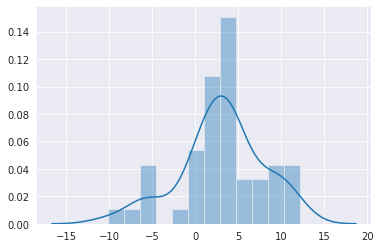

In [130]:
sns.distplot(rawTraces[0])

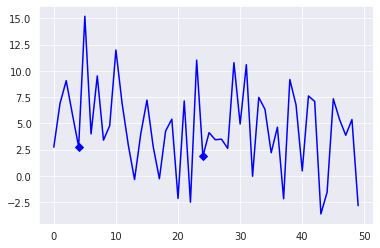

In [131]:
plt.plot(rawTraces[1],'-bD',markevery=[fieldMaskedLekage,fieldMasked])

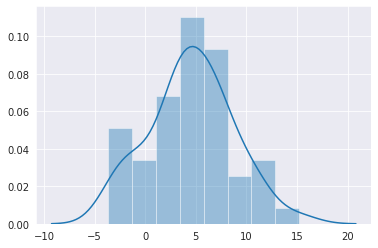

In [132]:
sns.distplot(rawTraces[1])

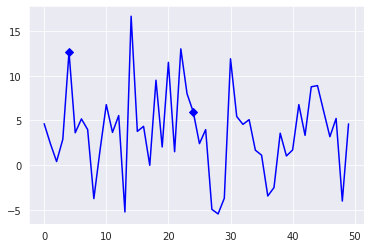

In [133]:
plt.plot(rawTraces[2],'-bD',markevery=[fieldMaskedLekage,fieldMasked])

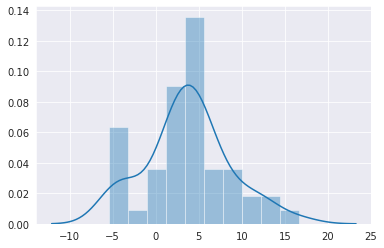

In [134]:
sns.distplot(rawTraces[2])

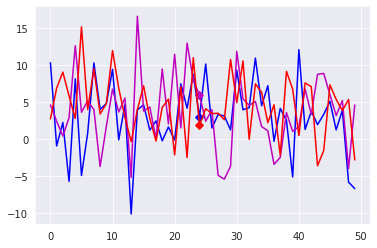

In [135]:
plt.plot(rawTraces[0],'-bD',rawTraces[2],'-mD',rawTraces[1],'-rD',markevery=[24])

### Data Path

In [136]:
#Set data path
dataPath = ''
if FixedPlaintext == True:
    dataPath = 'FixedPlaintext'
else:
    dataPath = 'RandomPlaintext'

### Unit Tests

In [137]:
class TestNotebook(unittest.TestCase):

    def test_LeakedData_size_equals_labels(self):
        self.assertEqual(len(leakedData), len(labels))
    def test_DataSize(self):
        self.assertEqual(len(leakedData), data_leng)    
        self.assertEqual(len(labels), data_leng)
    def test_FixedPlaintext(self):
        self.assertEqual(FixedPlaintext, True) 
    def test_Jitter(self):
        self.assertEqual(activateJitter, False)
    def test_Mask(self):
        self.assertEqual(maskedValue, True)
    def test_DataPath(self):
        self.assertEqual(dataPath, 'FixedPlaintext')
    
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_DataPath (__main__.TestNotebook) ... ok
test_DataSize (__main__.TestNotebook) ... ok
test_FixedPlaintext (__main__.TestNotebook) ... ok
test_Jitter (__main__.TestNotebook) ... ok
test_LeakedData_size_equals_labels (__main__.TestNotebook) ... ok
test_Mask (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.005s

OK


In [138]:
rawTraces = pd.DataFrame(rawTraces)
rawTraces['label'] = pd.DataFrame(plaintext)
rawTraces.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,10.346358,-0.937268,2.247480,-5.739707,8.159117,-4.941961,0.817110,10.317182,4.021334,4.794708,...,1.296164,3.762688,1.955653,3.344157,5.106505,1.248038,3.894031,-5.840298,-6.724675,236
1,2.729637,6.895057,9.068029,5.854657,2.783244,15.206166,3.998437,9.519437,3.399937,4.777154,...,7.612439,7.092988,-3.626598,-1.564941,7.342013,5.376830,3.868485,5.363734,-2.839432,236
2,4.636771,2.413510,0.413143,2.891404,12.643741,3.627182,5.174111,3.983256,-3.727270,1.709111,...,6.773445,3.336808,8.762265,8.895068,6.020617,3.185186,5.225364,-4.005931,4.616277,236
3,-3.017815,4.069673,1.383203,5.859480,8.812999,-0.719636,6.839713,-0.275191,-4.520175,1.101058,...,10.266228,-6.686181,0.642813,11.289337,5.673013,-6.426665,9.057003,11.413224,-0.923514,236
4,2.082697,1.132495,-3.542820,8.808176,-2.093151,1.816897,1.870701,-1.409146,13.862750,3.384445,...,-6.822401,8.479574,3.556382,10.589231,11.143418,3.657492,-2.291389,2.922804,8.878448,236


### Write Data

In [139]:
simulated_traces = pd.DataFrame(rawTraces)
simulated_traces.to_csv('./'+dataPath+'/TS3_A.csv',index=False)